In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('KDDTrain+.txt', header=None)




In [ ]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

In [ ]:
data.columns = columns


In [ ]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:

data = pd.get_dummies(data, columns=['protocol_type', 'service', 'flag'])



In [ ]:
data["outcome"].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [ ]:

dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
U2R = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
Sybil = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']


attack_labels = ['Normal','DoS','Probe','U2R','Sybil']
def map_attack(attack):
    if attack in dos_attacks:
        # dos_attacks map to 1
        attack_type = 1
    elif attack in probe_attacks:
        # probe_attacks mapt to 2
        attack_type = 2
    elif attack in U2R:
        # privilege escalation attacks map to 3
        attack_type = 3
    elif attack in Sybil:
        # remote access attacks map to 4
        attack_type = 4
    else:
        # normal maps to 0
        attack_type = 0

    return attack_type

# map the data and join to the data set
attack_map = data.outcome.apply(map_attack)
data['attack_map'] = attack_map

# view the result
data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_map
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
data["attack_map"].unique()



array([0, 1, 4, 2, 3])

In [ ]:
data_test = data["attack_map"]

In [ ]:

data_train = data.drop(columns = ["attack_map","outcome"])

In [ ]:


scaler = StandardScaler()
data_train_scaled = scaler.fit_transform(data_train)

kmeans = KMeans(n_clusters=5)
kmeans.fit(data_train_scaled)

labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


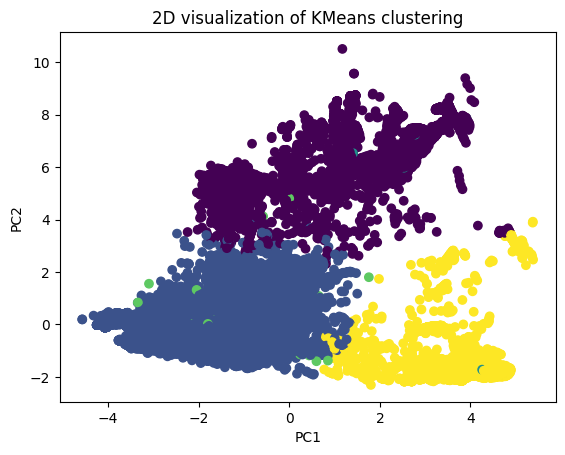

In [ ]:


import matplotlib.pyplot as plt
pca = PCA(n_components=2)
data_train_pca = pca.fit_transform(data_train_scaled)

plt.scatter(data_train_pca[:, 0], data_train_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D visualization of KMeans clustering')
plt.show()


In [ ]:
unique_values, counts = np.unique(labels_pred, return_counts=True)
for unique_value, count in zip(unique_values, counts):
  print(f"Unique value: {unique_value}, Count: {count}")


Unique value: 0, Count: 569
Unique value: 1, Count: 75898
Unique value: 2, Count: 34491
Unique value: 3, Count: 2
Unique value: 4, Count: 15013


In [ ]:
unique_values, counts = np.unique(data_test, return_counts=True)
for unique_value, count in zip(unique_values, counts):
  print(f"Unique value: {unique_value}, Count: {count}")


Unique value: 0, Count: 67352
Unique value: 1, Count: 45927
Unique value: 2, Count: 11656
Unique value: 3, Count: 43
Unique value: 4, Count: 995


In [ ]:


pred_cluster = kmeans.predict(data_train_scaled)


In [ ]:
unique_values, counts = np.unique(pred_cluster, return_counts=True)
sum =0
for unique_value, count in zip(unique_values, counts):
  print(f"Unique value: {unique_value}, Count: {count}")
  sum = sum+count
print(sum)

Unique value: 0, Count: 14990
Unique value: 1, Count: 75883
Unique value: 2, Count: 617
Unique value: 3, Count: 62
Unique value: 4, Count: 34421
125973


In [ ]:
unique_values, counts = np.unique(data_test, return_counts=True)
sum =0
for unique_value, count in zip(unique_values, counts):
  print(f"Unique value: {unique_value}, Count: {count}")
  sum = sum+count
print(sum)

Unique value: 0, Count: 67352
Unique value: 1, Count: 45927
Unique value: 2, Count: 11656
Unique value: 3, Count: 43
Unique value: 4, Count: 995
125973
